<a href="https://colab.research.google.com/github/Ar8k/Assigment-2.2-CSS-Text-Styling/blob/main/week8_assignment_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the data:

Order Value: Represents the total value of the customer's order.

Customer Rating: Represents the rating given by the customer, typically between 1 and 5.

Shipping Time (Days): Represents the number of days taken to deliver the order.


**Note: This assignment and dataset have outliers and missing values generated on purpose to help you understand the importance of data cleaning and preprocessing in preparing data for analysis and modeling**

In [1]:
# Run this cell first and then answer the questions given in the assignment.

import numpy as np
import pandas as pd

np.random.seed(42)

# Generating sample data
data = {
    'Order Value': np.random.normal(100, 20, 30),
    'Customer Rating': np.random.normal(4, 0.5, 30),
    'Shipping Time (Days)': np.random.randint(1, 10, 30)
}

# Introducing missing values and outliers on purpose
data['Order Value'][np.random.choice(30, 8, replace=False)] = np.nan
data['Customer Rating'][np.random.choice(30, 7, replace=False)] = np.nan

data['Order Value'][np.random.choice(30, 7, replace=False)] = [300, 400, 300, 350, 400, 450, 700]
data['Customer Rating'][np.random.choice(30, 5, replace=False)] = [1, 5, 0.5, 5.5, 1]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Order Value,Customer Rating,Shipping Time (Days)
0,109.934283,3.699147,2
1,97.234714,4.926139,1
2,112.953771,3.993251,7
3,130.460597,NaN,7
4,NaN,1.000000,8
5,95.317261,NaN,5
6,400.000000,4.104432,3
7,700.000000,3.020165,8
8,90.610512,3.335907,6
9,350.000000,NaN,3


In [2]:
#Counting the amount of missing values
missing_amount = df.isnull().sum()

print("Missing Values for every column:\n", missing_amount)


Missing Values for every column:
 Order Value             6
Customer Rating         5
Shipping Time (Days)    0
dtype: int64


In [4]:
#The percentage of the missing values
missing_percantage =  (df.isnull().sum() / len(df)) * 100
missing_sum = pd.DataFrame ({
    'Missing Amount' : missing_amount,
    'Missing Percentage' : missing_percantage
})
print("Sum of the missing values:\n", missing_sum)



Sum of the missing values:
                       Missing Amount  Missing Percentage
Order Value                        6           20.000000
Customer Rating                    5           16.666667
Shipping Time (Days)               0            0.000000


In [5]:
#making a copy of the original data so I dont modify it

df_replaced_mean = df.copy()

#Replacing the missing values in order value and customer rating with the means of the data
df_replaced_mean['Order Value'] = df_replaced_mean['Order Value'].fillna(df['Order Value'].mean())
df_replaced_mean['Customer Rating'] = df_replaced_mean['Customer Rating'].fillna(df['Customer Rating'].mean())

print("Missing values after replacing with the mean\n", df_replaced_mean.isnull().sum())



Missing values after replacing with the mean
 Order Value             0
Customer Rating         0
Shipping Time (Days)    0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

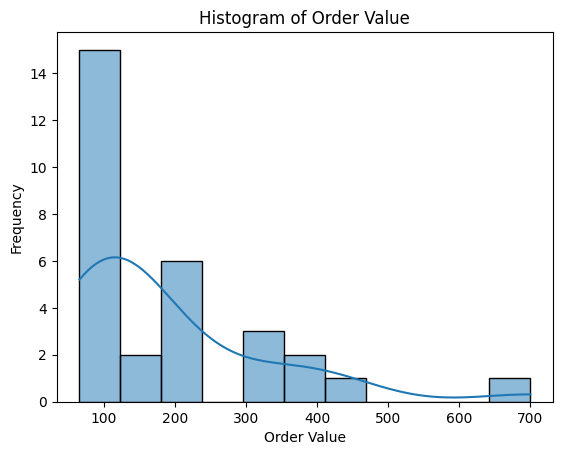

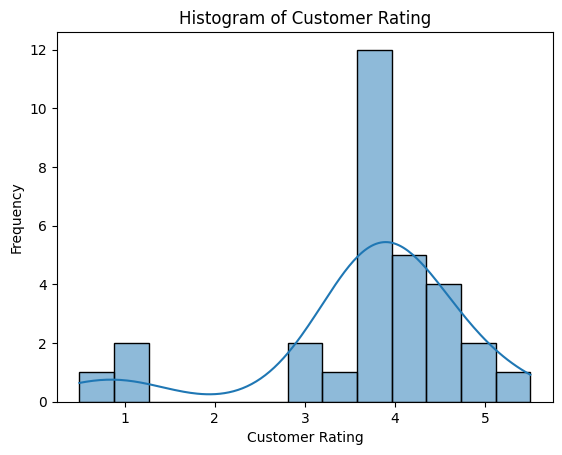

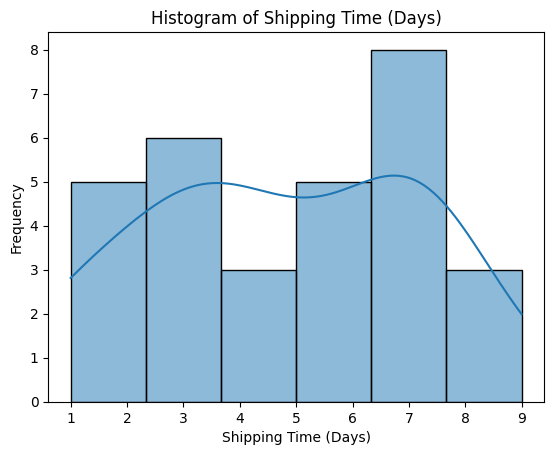

In [8]:
for col in ['Order Value', 'Customer Rating', 'Shipping Time (Days)']:
  plt.figure()
  sns.histplot(df_replaced_mean[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()



In [9]:
from scipy import stats



In [10]:
#Dropping the rows with NaN

df_no_na = df.dropna()

#calculate z-scores
z_scores = np.abs(stats.zscore(df_no_na[['Order Value', 'Customer Rating']]))
outlier_mask = (z_scores < 3).all(axis=1)
#Removing the outliers
df_no_outlier = df_no_na[outlier_mask]

print("Before removing the outliers: ", df_no_na.shape)
print("After removing the outliers: ", df_no_outlier.shape)


Before removing the outliers:  (19, 3)
After removing the outliers:  (18, 3)


**The dataset had missing values in only 2 columns, Order values and Customer rating**


*   **Order Value** had **8** missing entires
*  **Customer Rating** had **7** missing entires



I fixed the missing values by replacing the missing values with the mean for each column.

*   The **upside** of this method is: It keeps the size of the dataset and made it to where no information was removed.
*   The **downside** of this method is: It removes variation in the data.



For the outliers, I first visdualized the data with histograms, Then I used z-score to find the outliers, it removed all the outliering values.

**Conclusion**:

*   Cleaning the data and finding all the missing/outling values really shows a better picture and imporver the dataset.

*   Removing the outliers and replacing all the missing values greatly imporved the accuracy and overall imporved the dataset, making it more stable, but it also lowered variation in the dataset.
